# Colorize icons

### Setup path and get icons to colorize

In [10]:
import pathlib

pathlib.Path("").parent.absolute()


PosixPath('/home/hedwin/computing/hbicons')

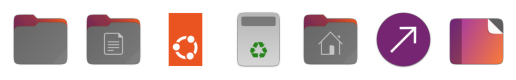

In [66]:
import pathlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


source_icons_path = pathlib.Path("").parent.absolute() / 'icons' / 'hbicons' / "256x256" / "places"
icons_to_colorize = [
    mpimg.imread(str(source_icons_path / image_file_name)) for image_file_name in ["folder.png", "folder-documents.png", "start-here.png", "user-trash.png", "user-home.png"]
]
icons_to_colorize.append(mpimg.imread(str(source_icons_path.parent / "emblems" / "emblem-symbolic-link.png")))
icons_to_colorize.append(mpimg.imread(str(source_icons_path.parent / "categories" / "preferences-desktop-theme.png")))

fig, axs = plt.subplots(1, len(icons_to_colorize))

for i in range(len(icons_to_colorize)):
    axs[i].set_axis_off()
    axs[i].imshow(icons_to_colorize[i])
plt.show()

### Setup a source color to change

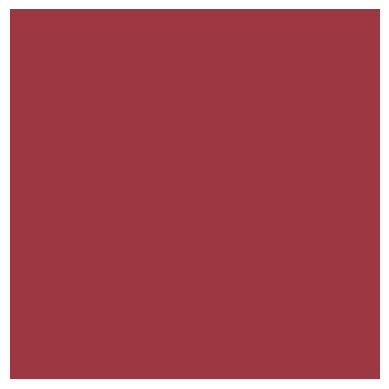

In [46]:
from PIL import Image
import numpy as np


# Get the current color of the copied directory
reference_icon_path = source_icons_path / "folder.png"
image = Image.open(reference_icon_path)         # Load the image
current_pixel_color = image.getpixel((100, 30))        # Get the color of the pixel at coordinates (x, y)

color_img = np.zeros((256, 256, 4), dtype=np.int32)
color_img[:, :] = current_pixel_color
plt.cla()
plt.axis("off")
plt.imshow(color_img)
plt.show()

### Try to colorize it using opencv

In [ ]:
# Python program to explain cv2.cvtColor() method

# importing cv2
import cv2

# path
path = r'C:\Users\Administrator\Desktop\geeks.png'

# Reading an image in default mode
src = cv2.imread(path)

# Window name in which image is displayed
window_name = 'Image'

# Using cv2.cvtColor() method
# Using cv2.COLOR_BGR2GRAY color space
# conversion code
image = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY )

# Displaying the image
cv2.imshow(window_name, image)

### Using logarithmic scale

In [86]:
import numpy as np
import matplotlib.pyplot as plt

def color_distance(c1, c2):
    """
    Calculate the Euclidean distance between two RGB colors.
    c1, c2 are numpy arrays of shape (3,) representing RGB colors.
    """
    return np.sqrt(np.sum((c1 - c2) ** 2))

def colorize_image(image, source_color, target_color, max_distance=255, log_base=2):
    """
    Colorize an image by transitioning from source_color to target_color.

    Args:
    - image: (h, w, 3) RGB image.
    - source_color: The color to start the transition from (e.g., orange).
    - target_color: The color to transition towards (e.g., blue).
    - max_distance: The maximum distance for the color change effect.
    - log_base: Base for the logarithmic scale controlling the strength of the change.

    Returns:
    - A colorized image.
    """
    # Normalize source_color and target_color to numpy arrays
    source_color = np.array(source_color, dtype=float)
    target_color = np.array(target_color, dtype=float)

    # Calculate the color distance for each pixel
    height, width, _ = image.shape
    output_image = image.astype(float)

    for i in range(height):
        for j in range(width):
            # Get the current pixel's color
            pixel_color = image[i, j, :]

            # Calculate the distance between the pixel color and the source color
            dist = color_distance(pixel_color, source_color)

            # Apply logarithmic scaling to determine how much to modify the color
            scale = 1 - np.log(1 + dist) / np.log(1 + max_distance)  # Logarithmic scaling

            # Compute the color transition based on the scale
            modified_color = pixel_color + scale * (target_color - pixel_color)

            # Make sure the color stays within [0, 255]
            output_image[i, j, :] = np.clip(modified_color, 0, 255)

    return output_image.astype(np.uint8)

# Example Usage:

# Define source (orange) and target (blue) colors
source_color = current_pixel_color[:3]
target_color = [0, 0, 255]  # Blue

image: np.ndarray = (icons_to_colorize[0][:, :, :3] * 255)
image.astype(np.int32)
s = image.shape

# Colorize the image
colorized_image = colorize_image(image, source_color, target_color)

# Plot the original and colorized images
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Show original image
axs[0].imshow(image)
axs[0].set_title("Original Image")
axs[0].axis('off')

# Show colorized image
axs[1].imshow(colorized_image)
axs[1].set_title("Colorized Image (Orange to Blue)")
axs[1].axis('off')

plt.tight_layout()
plt.show()


KeyboardInterrupt: 

### Now with our image

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def color_distance(c1, c2):
    """
    Calculate the Euclidean distance between two RGB colors.
    c1, c2 are numpy arrays of shape (3,) representing RGB colors.
    """
    return np.sqrt(np.sum((c1 - c2) ** 2))

def colorize_image(image, source_color, target_color, max_distance=255, log_base=2):
    """
    Colorize an image by transitioning from source_color to target_color.

    Args:
    - image: (h, w, 3) RGB image.
    - source_color: The color to start the transition from (e.g., orange).
    - target_color: The color to transition towards (e.g., blue).
    - max_distance: The maximum distance for the color change effect.
    - log_base: Base for the logarithmic scale controlling the strength of the change.

    Returns:
    - A colorized image.
    """
    # Normalize source_color and target_color to numpy arrays
    source_color = np.array(source_color, dtype=float)
    target_color = np.array(target_color, dtype=float)

    # Calculate the color distance for each pixel
    height, width, _ = image.shape
    output_image = image.astype(float)

    for i in range(height):
        for j in range(width):
            # Get the current pixel's color
            pixel_color = image[i, j, :]

            # Calculate the distance between the pixel color and the source color
            dist = color_distance(pixel_color, source_color)

            # Apply logarithmic scaling to determine how much to modify the color
            scale = 1 - np.log(1 + dist) / np.log(1 + max_distance)  # Logarithmic scaling

            # Compute the color transition based on the scale
            modified_color = pixel_color + scale * (target_color - pixel_color)

            # Make sure the color stays within [0, 255]
            output_image[i, j, :] = np.clip(modified_color, 0, 255)

    return output_image.astype(np.uint8)

# Example Usage:

# Create an example image with a few colors
h, w = 256, 256
image = np.zeros((h, w, 3), dtype=np.uint8)

# Example: fill some areas with different colors
image[50:100, 50:100] = [255, 165, 0]  # Orange
image[100:150, 100:150] = [128, 0, 128]  # Purple
image[150:200, 150:200] = [169, 169, 169]  # Grey

# Define source (orange) and target (blue) colors
source_color = [255, 165, 0]  # Orange
target_color = [0, 0, 255]  # Blue

# Colorize the image
colorized_image = colorize_image(image, source_color, target_color)

# Plot the original and colorized images
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Show original image
axs[0].imshow(image)
axs[0].set_title("Original Image")
axs[0].axis('off')

# Show colorized image
axs[1].imshow(colorized_image)
axs[1].set_title("Colorized Image (Orange to Blue)")
axs[1].axis('off')

plt.tight_layout()
plt.show()

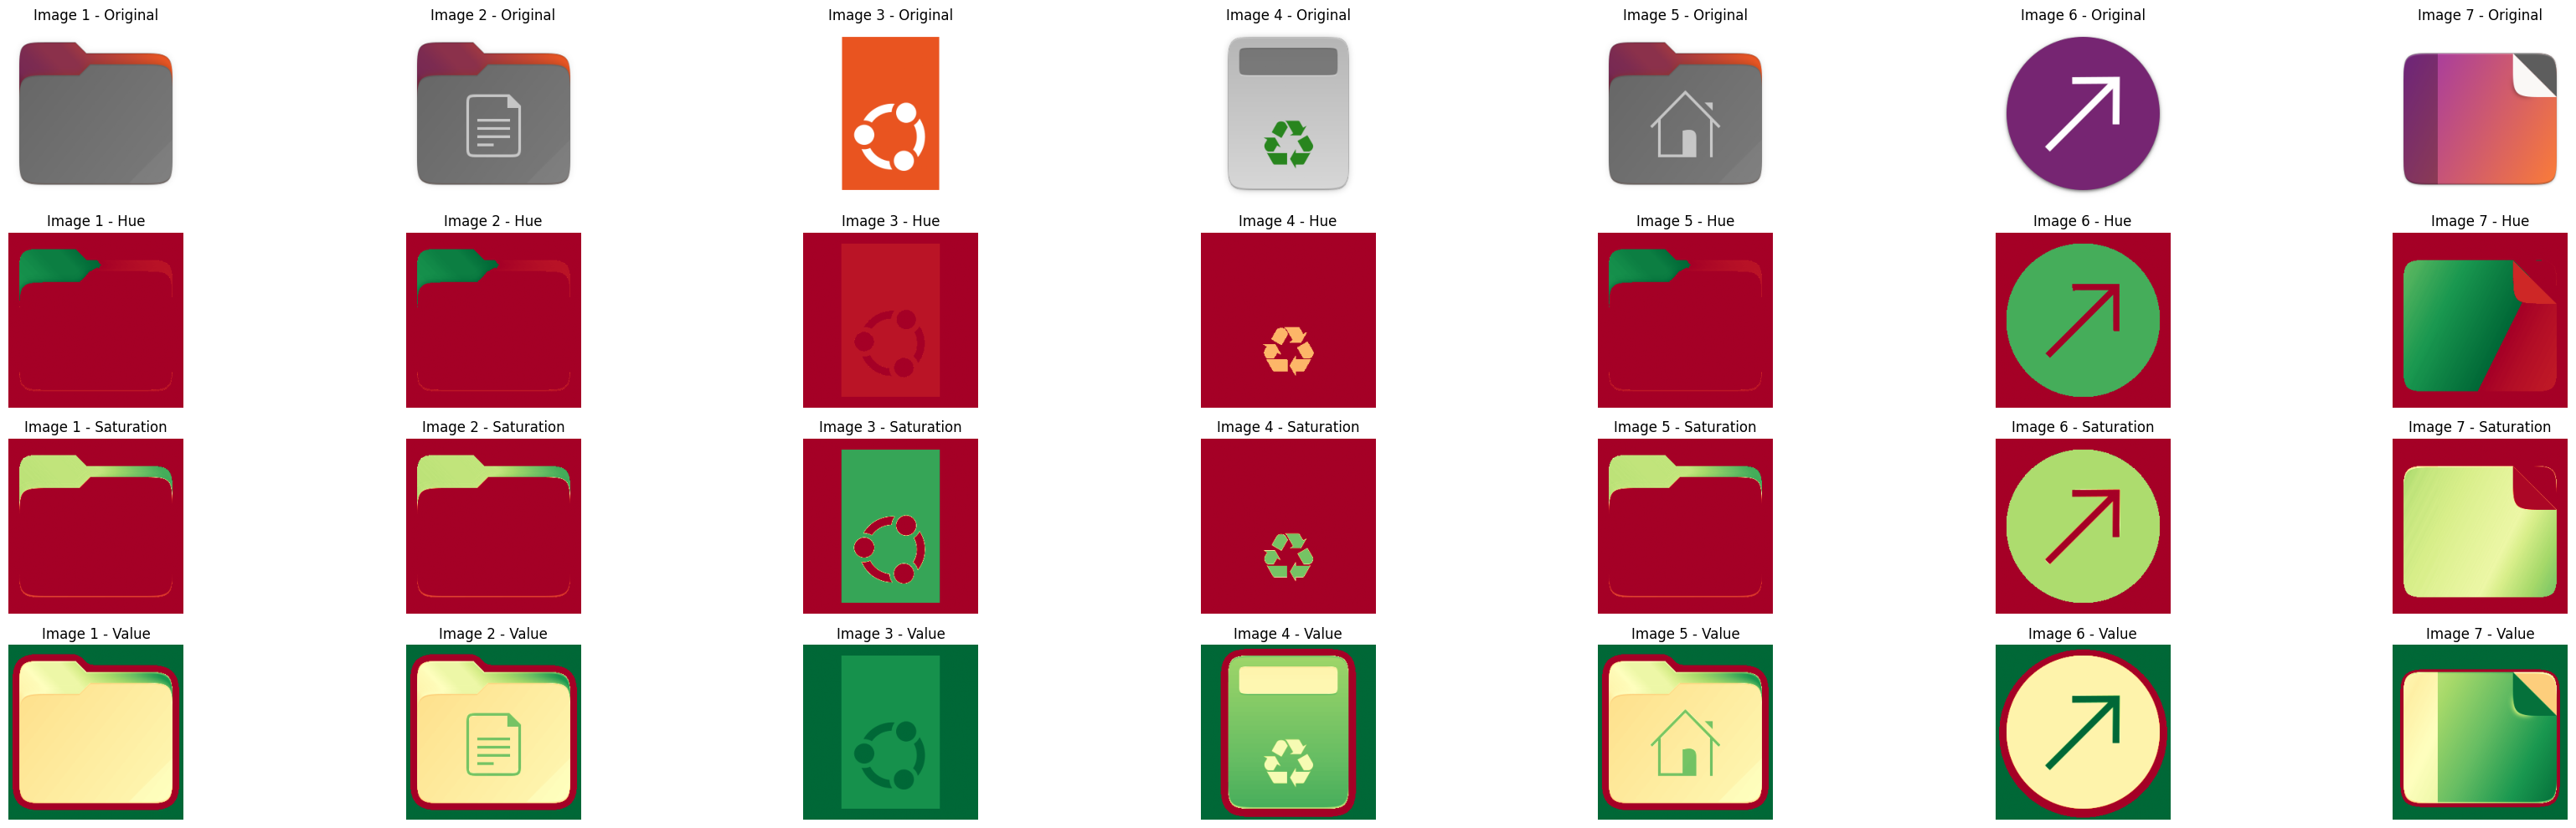

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import rgb_to_hsv

# Define colormap (Red = low, Green = high)
cmap = plt.cm.RdYlGn

# Number of images
num_images = len(icons_to_colorize)

# Create a figure with (3 rows, num_images columns)
fig, axs = plt.subplots(4, num_images, figsize=(5 * num_images, 10))

# Iterate over images
for i in range(num_images):
    # Convert RGB to HSV
    hsv_img = rgb_to_hsv(icons_to_colorize[i][:, :, :3])  # Ensure shape (H, W, 3)

    # Extract H, S, V components
    hue = hsv_img[:, :, 0]
    saturation = hsv_img[:, :, 1]
    value = hsv_img[:, :, 2]

    # Plot normal
    axs[0, i].imshow(icons_to_colorize[i])
    axs[0, i].set_title(f"Image {i+1} - Original")
    axs[0, i].axis("off")

    # Plot Hue
    axs[1, i].imshow(hue, cmap=cmap, vmin=0, vmax=1)
    axs[1, i].set_title(f"Image {i+1} - Hue")
    axs[1, i].axis("off")

    # Plot Saturation
    axs[2, i].imshow(saturation, cmap=cmap, vmin=0, vmax=1)
    axs[2, i].set_title(f"Image {i+1} - Saturation")
    axs[2, i].axis("off")

    # Plot Value
    axs[3, i].imshow(value, cmap=cmap, vmin=0, vmax=1)
    axs[3, i].set_title(f"Image {i+1} - Value")
    axs[3, i].axis("off")

# Adjust layout and show
plt.tight_layout()
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


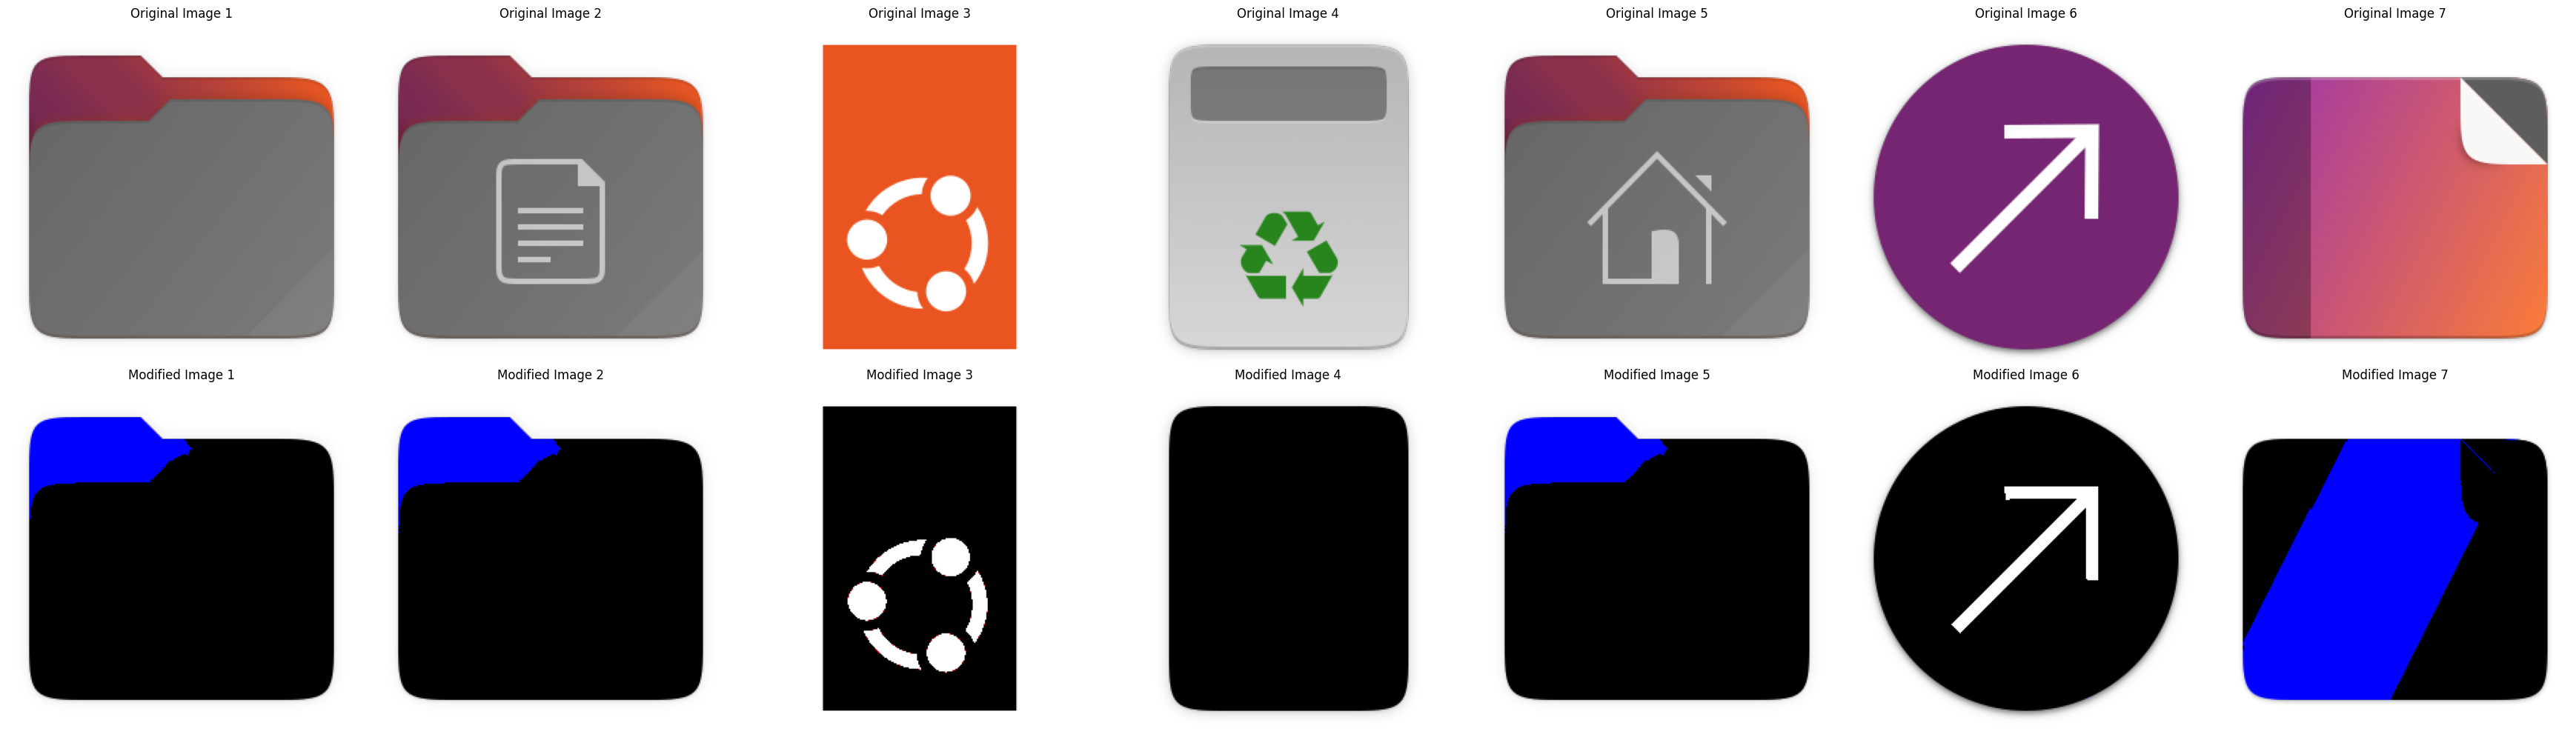

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import rgb_to_hsv, hsv_to_rgb

# Define fixed RGB colors
fixed_rgb_target = np.array(current_pixel_color[:3])  # Orange (RGB)
fixed_rgb_new = np.array([0, 0, 255])  # Blue (RGB)

# Convert fixed RGB to HSV
target_hsv = rgb_to_hsv(fixed_rgb_target / 255.0)
new_hsv_color = rgb_to_hsv(fixed_rgb_new / 255.0)

# Define color similarity threshold
threshold = 0.1

# Process each image
modified_images = []

for img in icons_to_colorize:
    # Extract the alpha channel (if image has transparency)
    if img.shape[-1] == 4:  # If RGBA
        alpha_channel = img[:, :, 3]  # Save Alpha
        rgb_img = img[:, :, :3]  # Extract RGB
    else:
        alpha_channel = None  # No alpha
        rgb_img = img  # Keep as is

    # Convert RGB to HSV
    hsv_img = rgb_to_hsv(rgb_img / 255.0)  # Normalize to [0,1] before conversion

    # Compute absolute difference in Hue
    hue_diff = np.abs(hsv_img[:, :, 0] - target_hsv[0])

    # Create a mask for pixels close to the target hue
    mask = hue_diff < threshold

    # Replace only those pixels with the new color
    hsv_img[mask] = new_hsv_color

    # Convert back to RGB
    modified_rgb = hsv_to_rgb(hsv_img) * 255  # Scale back to [0,255]

    # Clip the values to ensure they fall within [0, 255]
    modified_rgb = np.clip(modified_rgb, 0, 255)

    # Convert to integers
    modified_rgb = modified_rgb.astype(np.uint8)

    # Reattach the alpha channel (if it existed)
    if alpha_channel is not None:
        modified_rgba = np.dstack((modified_rgb, alpha_channel))  # Add back alpha
    else:
        modified_rgba = modified_rgb  # No alpha to restore

    # Append modified image
    modified_images.append(modified_rgba)

# Plot original and modified images
fig, axs = plt.subplots(2, len(icons_to_colorize), figsize=(5 * len(icons_to_colorize), 10))

for i in range(len(icons_to_colorize)):
    # Show original
    axs[0, i].imshow(icons_to_colorize[i])
    axs[0, i].set_title(f"Original Image {i+1}")
    axs[0, i].axis("off")

    # Show modified
    axs[1, i].imshow(modified_images[i])
    axs[1, i].set_title(f"Modified Image {i+1}")
    axs[1, i].axis("off")

# Adjust layout
plt.tight_layout()
plt.show()
